In [43]:
import os
from configparser import ConfigParser
path_config_file = os.getcwd().split('docrv2_sroie')[0] + 'docrv2_sroie/' + 'config.ini'
common_variable = ConfigParser()
common_variable.read(path_config_file)

print(common_variable.sections())
print(common_variable['database']['module_path'])
print(common_variable['database']['DB_BASE'])

import sys
sys.path.append(common_variable['database']['module_path'])
from db_util import *
from db import *

import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import time

from parse import parse
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
from glob import glob
from tqdm import tqdm_notebook
import matplotlib.patches as patches

['database', 'mlflow', 'font']
/home/dk/docrv2_sroie/modules/database/
/home/dk/docrv2_sroie/DB/


In [369]:
dblist = ['/media/dk/HDD/DB/exp_result_000',
         '/media/dk/HDD/DB/exp_result_001',
         '/media/dk/HDD/DB/exp_result_002',
         '/media/dk/HDD/DB/exp_result_003',
         '/media/dk/HDD/DB/exp_result_004',
         '/media/dk/HDD/DB/exp_result_005',
         '/media/dk/HDD/DB/exp_result_006',
         '/media/dk/HDD/DB/exp_result_007',
         '/media/dk/HDD/DB/exp_result_008',
         '/media/dk/HDD/DB/exp_result_009']
dblist = ['/home/dk/docrv2_sroie/DB/halfsize_context_v4_2_3_t3']
#dblist = ['/home/dk/docrv2_sroie/DB/inference_crop_0831_thr05_all']

In [364]:
def showimage(ind,xpad = -2,ypad = 4):

    d = open_env('/home/dk/docrv2_sroie/DB/halfsize_context_v4_2_3_t3_preview_detection/')

    #ind = 100

    dimsize = read_data_from_db_by_index(d,'img',ind).size
    fig,ax = plt.subplots(1,figsize=(dimsize[0]/96,dimsize[1]/96))

    ax.imshow(read_data_from_db_by_index(d,'img',ind))
    ax.imshow(np.array(np.array(read_data_from_db_by_index(d,'img',ind+361).resize(
        read_data_from_db_by_index(d,'img',ind).size),dtype=np.float32)/255<0.6,dtype=np.float32),alpha=0.6)
    #print(read_data_from_db_by_index(d,'img',ind).size)
    #print(read_data_from_db_by_index(d,'img',ind+361).size)

    raw_data_db_path = '/home/dk/docrv2_sroie/DB/raw_test_task12_img_txt'   
    datadb = open_env(path=raw_data_db_path)
    img_ref = read_data_from_db_by_index(datadb, 'ref', ind)
    txtfile = '/home/dk/docrv2_sroie/evaluation/task1/gt_361/'+img_ref+'.txt'
    detectfile = '/home/dk/docrv2_sroie/evaluation/task1/submit_halfsize_context_v4_2_3_t3_/'+img_ref+'.txt'
    #ypad = 4
    #xpad = -2

    try:
        f = open(txtfile,'r')
        txt = f.read().split('\n')
    except:
        f = open(txtfile,'r', encoding='ISO-8859-1')
        txt = f.read().split('\n')
    for idx in range(len(txt)):
        if len(txt[idx])>0:
            ps = parse('{},{},{},{},{},{},{},{},{}',txt[idx])
            lps = list(ps)
            x0, y0, x1, y1 = int(lps[0]),int(lps[1]),int(lps[4]),int(lps[5])
            """
            x0 +=xpad
            x1 -=xpad
            y0 +=ypad*(y1-y0)/32
            y1 -=ypad*(y1-y0)/32
            """
            rect = patches.Rectangle((x0,y0),x1-x0,y1-y0,linewidth=1,edgecolor='g',facecolor='none')
            ax.add_patch(rect)

    try:
        f = open(detectfile,'r')
        txt = f.read().split('\n')
    except:
        f = open(detectfile,'r', encoding='ISO-8859-1')
        txt = f.read().split('\n')
    for idx in range(len(txt)):
        if len(txt[idx])>0:
            ps = parse('{},{},{},{},{},{},{},{}',txt[idx])
            lps = list(ps)
            x0, y0, x1, y1 = int(lps[0]),int(lps[1]),int(lps[4]),int(lps[5])

            x0 -=xpad
            x1 +=xpad
            y0 -=ypad
            y1 +=ypad

            rect = patches.Rectangle((x0,y0),x1-x0,y1-y0,linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
    plt.title(txtfile)
    print(txtfile)



103
/home/dk/docrv2_sroie/evaluation/task1/gt_361/X51007846379.txt


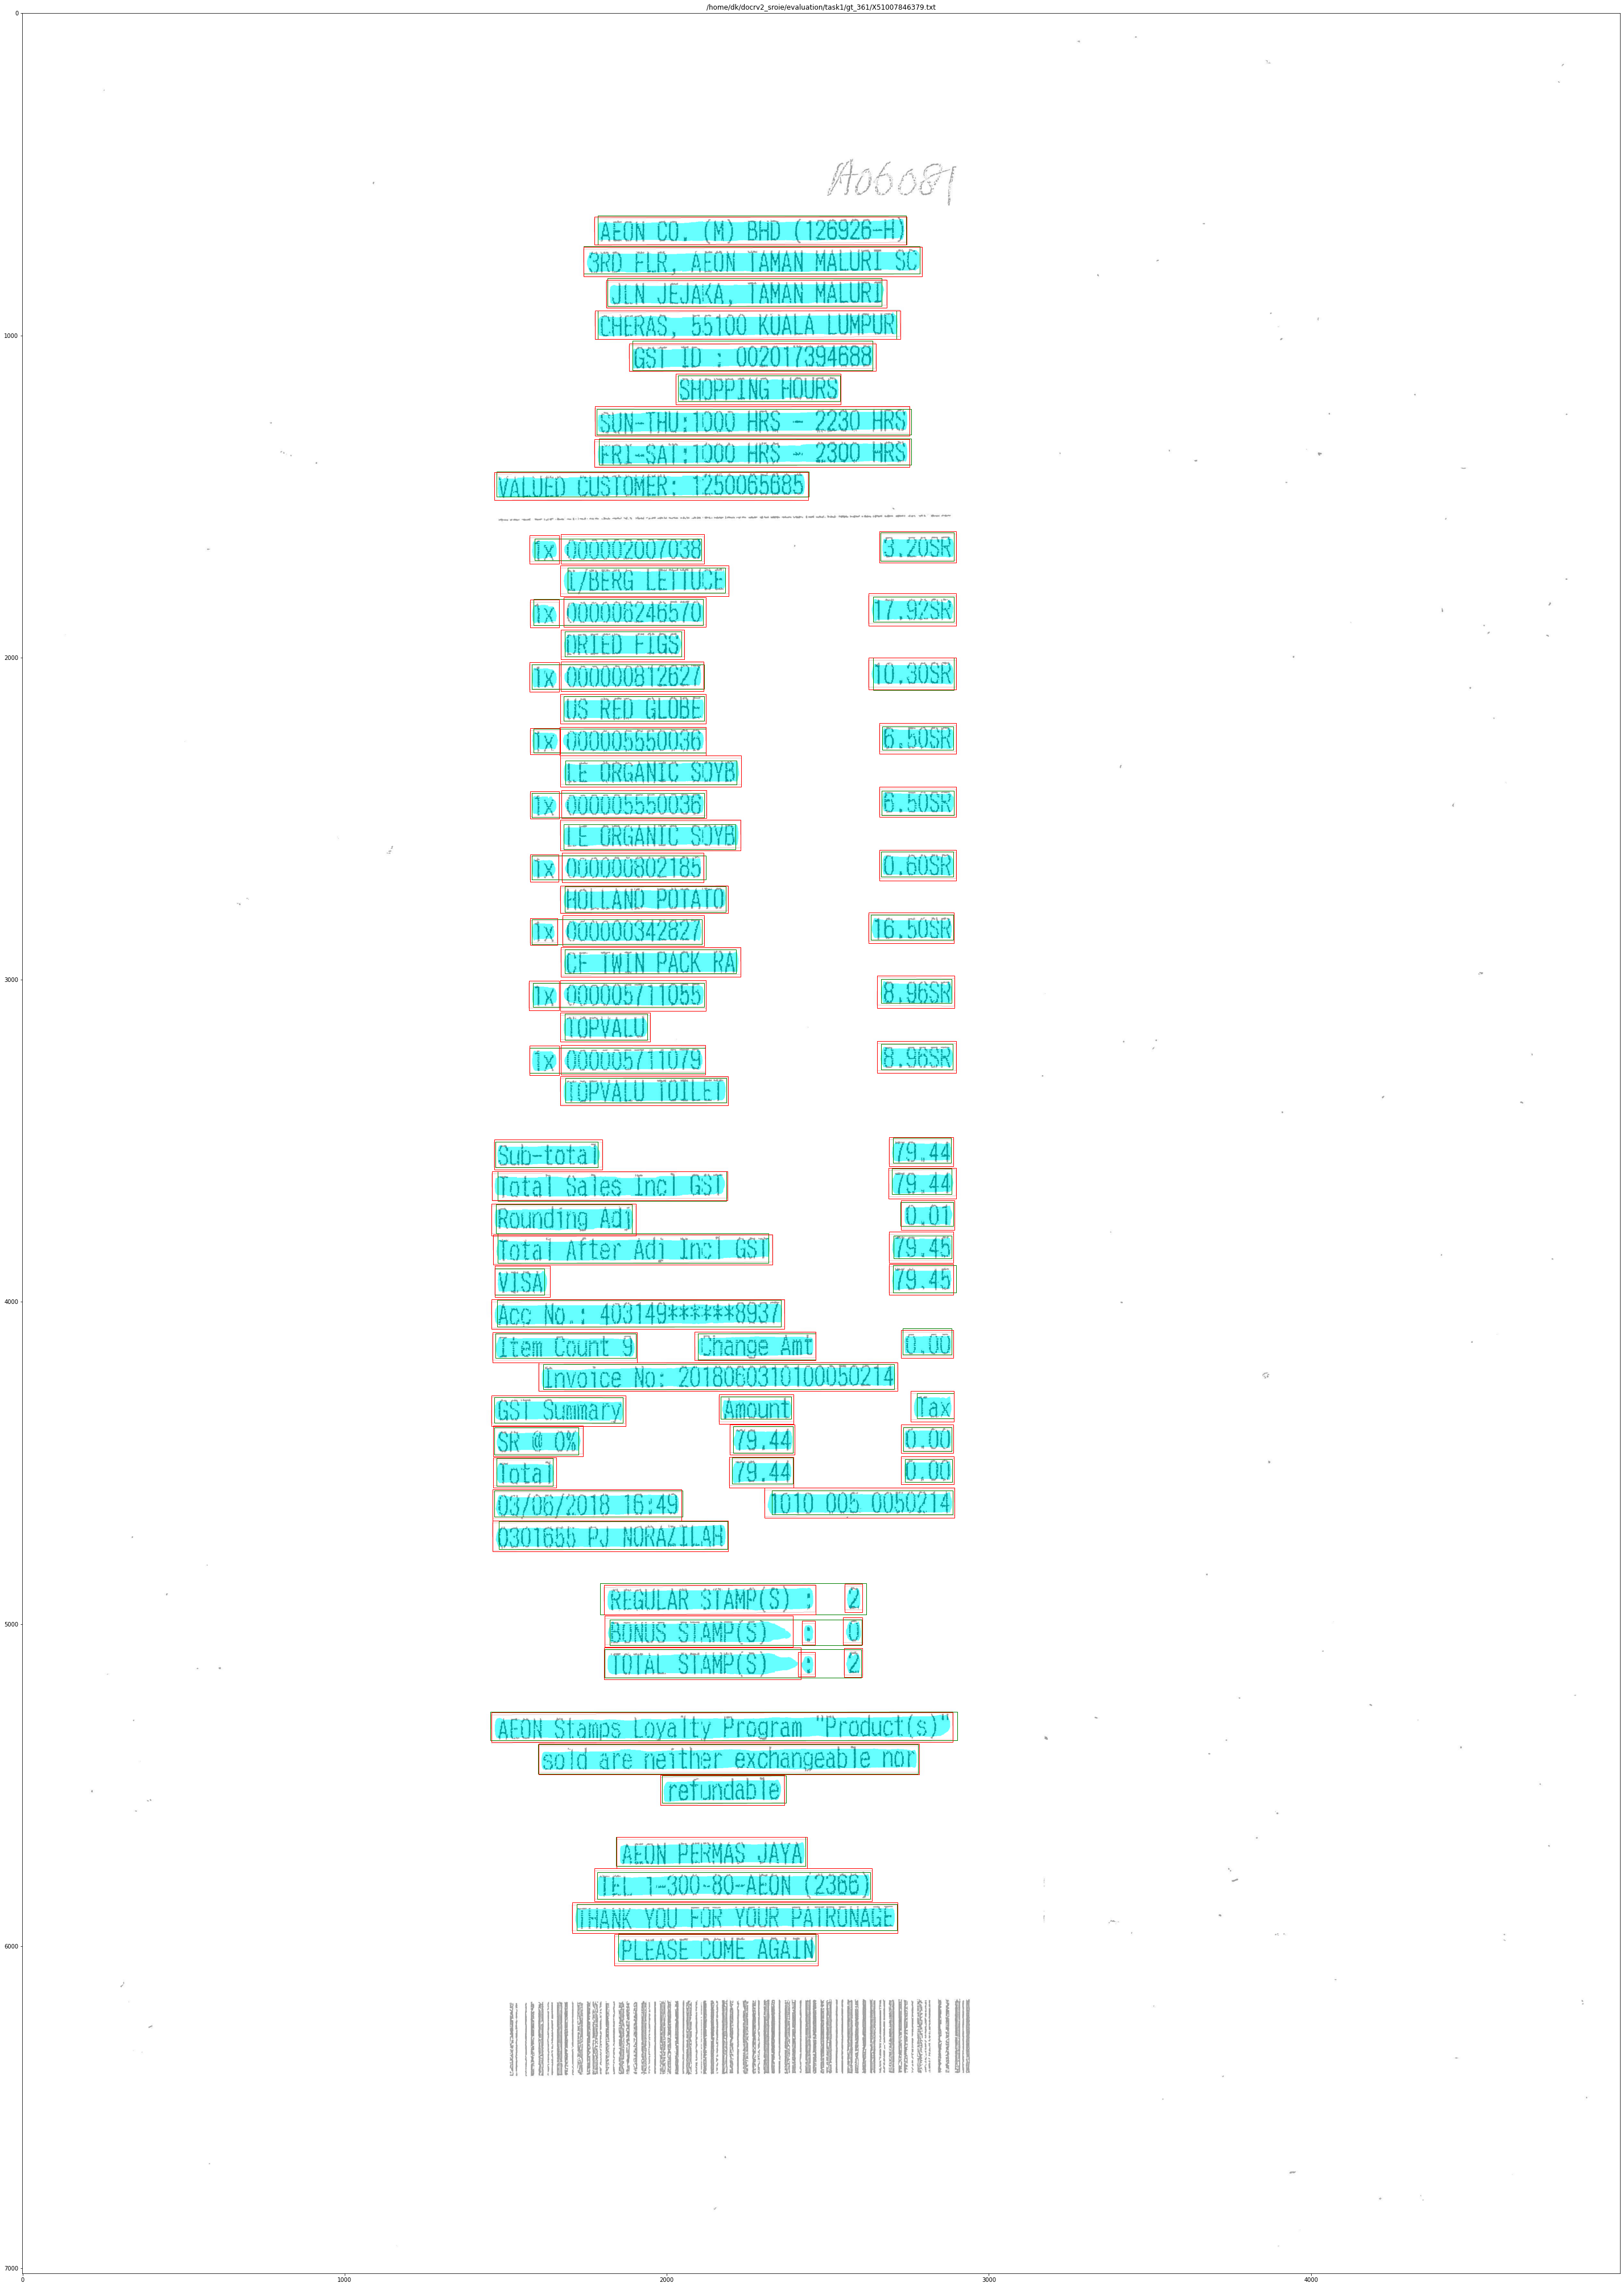

In [392]:
filelist = read_bulk_data_from_db(datadb, 'ref')
fstr = 'X51007846379'
for idx in range(len(filelist)):
    if filelist[idx] == fstr:
        print(idx)
        showimage(idx,0,7)

In [398]:
flist = ['X51007846290',
 'X51005230616',
 'X51006912976',
 'X51006913032',
 'X51006387931',
 'X51005568895',
 'X51007231372',
 'X51007231343',
 'X51006008081',
 'X51006714066',
 'X51006414512',
 'X51005675099',
 'X51005676534',
 'X51007231341',
 'X51006327960',
 'X51005746204',
 'X51007103610',
 'X51005746203',
 'X51006414715',
 'X51007846387',
 'X51006414702',
 'X51005676535',
 'X51005684949',
 'X51006556658',
 'X51005724625',
 'X51005806692',
 'X51006857540',
 'X51005663307',
 'X51005663309',
 'X51007103649',
 'X51005677327',
 'X51006334139',
 'X51006619503',
 'X51007846397',
 'X51007846361',
 'X51006502540',
 'X51007846400',
 'X51005663323',
 'X51005711446',
 'X51007231274',
 'X51007846321',
 'X51005361906',
 'X51007846268',
 'X51007846371',
 'X51007846372',
 'X51006414532',
 'X51005587261',
 'X51007846392',
 'X51006913061',
 'X51005711443',
 'X51009453729',
 'X51006311714',
 'X51007846303',
 'X51005676548',
 'X51005361923',
 'X51007103597',
 'X51007103687',
 'X51005724623',
 'X51005200931',
 'X51005806695',
 'X51007846289',
 'X51005301666',
 'X51006387737',
 'X51005230657',
 'X51007846360',
 'X51006502535',
 'X51007846288',
 'X51006913067',
 'X51006401977',
 'X51005746210',
 'X51005675104',
 'X51007846379',
 'X51005715007',
 'X51007339109',
 'X51005711402',
 'X51005705759',
 'X51005663300',
 'X51006619760',
 'X51006414433',
 'X51006619567',
 'X51005711444',
 'X51005677336',
 'X51005711449',
 'X51005675914',
 'X51005764161',
 'X51006414593',
 'X51005230605',
 'X51006438346',
 'X51006913060',
 'X51007846396',
 'X51006857126',
 'X51007846355',
 'X51005433548',
 'X51005705729',
 'X51007231346',
 'X51005710963',
 'X51005361908',
 'X51006008206',
 'X51006008082',
 'X51006401940',
 'X51006349081',
 'X51005433518',
 'X51005719823',
 'X51006414708',
 'X51005442322',
 'X51005705784',
 'X51005741929',
 'X51005715455',
 'X51005676537',
 'X51006414427',
 'X51007846282',
 'X51006619506',
 'X51007231276',
 'X51006414717',
 'X51005806718',
 'X00016469671',
 'X51007339121',
 'X00016469670',
 'X51006388089',
 'X51006387973',
 'X51006556723',
 'X51005763999',
 'X51006327953',
 'X51005677337',
 'X51006414592',
 'X51005676542',
 'X51007231364']

def isproblem(fstr):
    for idx in range(len(flist)):
        if flist[idx] == fstr:
            return True
    return False


/home/dk/docrv2_sroie/evaluation/task1/gt_361/X51005757308.txt


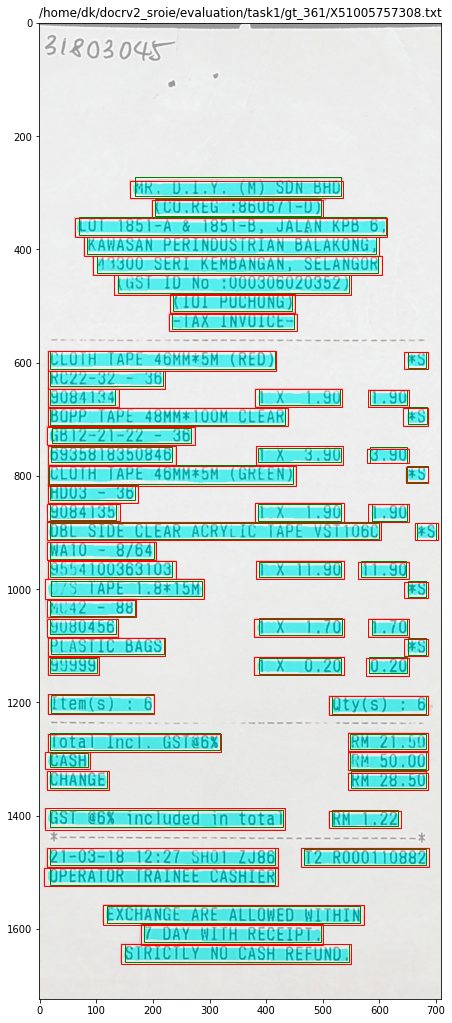

In [366]:
showimage(12,0,0) #6

In [400]:
"""
Evalution (1)
"""
# raw db
for idx, dbpath in enumerate(dblist):
    raw_data_db_path = '/home/dk/docrv2_sroie/DB/raw_test_task12_img_txt'
    
    datadb = open_env(path=raw_data_db_path)
    img_ref = read_bulk_data_from_db(datadb, prefix='ref')

    # target db
    target_db_name = os.path.basename(dbpath)
    #target_db_path = '/home/dk/docrv2_sroie/temp/raw_test_task12_img_txt_10imtest'
    target_db_path = dbpath
    
    target_db = open_env(path=target_db_path)

    # img = read_bulk_data_from_db(target_db, prefix='img')
    # img_c = read_bulk_data_from_db(datadb, prefix='img_c')
    char_c = read_bulk_data_from_db(target_db, prefix='char_c')
    # word_c = read_bulk_data_from_db(datadb, prefix='word_c')

    """
    Evalution (2)
    """
    #target_db_name = 'train_img_10'
    output_path = '/home/dk/docrv2_sroie/evaluation/task1/'
    output_path = os.path.join(output_path, target_db_name)
    os.makedirs(output_path, exist_ok=True)

    xpad = 0
    ypad = 0
    # create submission txt for each images
    for idx in tqdm(range(len(img_ref))):
        tchar = char_c[idx]
        rmlist = []
        oklist = []
        
        
        if isproblem(img_ref[idx]):
            xpad = 0
            ypad = 7
        else:
            xpad = 0
            ypad = 7
        
        for ii in range(len(tchar)):
            tchar[ii] = [float (i) for i in tchar[ii][0:8]]
            
            y0, y1 = tchar[ii][1],tchar[ii][5]
            tchar[ii][1] -= ypad
            tchar[ii][3] -= ypad
            tchar[ii][5] += ypad
            tchar[ii][7] += ypad
            
            tchar[ii][0] -= xpad
            tchar[ii][2] += xpad
            tchar[ii][4] += xpad
            tchar[ii][6] -= xpad
            
            tchar[ii] = [int(np.round(i)) for i in tchar[ii][0:8]]
            
            #tchar[ii] = [tchar[ii][0],tchar[ii][1],tchar[ii][4],tchar[ii][1],
            #            tchar[ii][4],tchar[ii][5],tchar[ii][0],tchar[ii][5]]
            if tchar[ii][0] > tchar[ii][4]:
                rmlist.append(ii)
            elif tchar[ii][1] > tchar[ii][5]:
                rmlist.append(ii)
            else:
                oklist.append(ii)
        
        tchar_temp = []
        for oki in oklist:
            tchar_temp.append(tchar[oki])
        tchar = tchar_temp
        
        txt_filename = img_ref[idx]+'.txt'
        df = pd.DataFrame(tchar)
        df.to_csv(os.path.join(output_path,txt_filename),sep=',',index=False,header=False)

        """
    Evaluation (3)
    """
    zip_name = 'submit_'+target_db_name+'_'
    shutil.make_archive(zip_name, 'zip', output_path) # to avoid including submit.zip

    # move submit.zip to task evaluation path
    eval_path = '/home/dk/docrv2_sroie/evaluation/task1/'
    try:
        shutil.move(os.path.join(os.getcwd(), zip_name+".zip"), eval_path) # move zip to output dir
    except:
        now = time.localtime()
        change_zip_name = zip_name+"{}{}{}".format(str(now.tm_hour), str(now.tm_min), str(now.tm_sec))
        os.rename(os.path.join(os.getcwd(), zip_name+".zip"),
                  os.path.join(os.getcwd(), change_zip_name+'.zip')
                 )
        zip_name = change_zip_name
        shutil.move(os.path.join(os.getcwd(), zip_name+".zip"), eval_path) # move zip to output dir

    # # copy gt.zip to task evaluation path
    # gt_path = '/media/myungsungkwak/msdisk/docrv2_data/d2gan_inference/gt/'
    # gt_name = "gt.zip"
    # shutil.copy(gt_path+gt_name, eval_path)
    print("Run command in {}\n$ python script.py -g=gt_361.zip -s={}.zip".format(eval_path, zip_name))
    print("Run command in {}\n$ python script_o.py -g=gt_361.zip -s={}.zip".format(eval_path, zip_name))

100%|██████████| 361/361 [00:01<00:00, 352.43it/s]

Run command in /home/dk/docrv2_sroie/evaluation/task1/
$ python script.py -g=gt_361.zip -s=submit_halfsize_context_v4_2_3_t3_163537.zip
Run command in /home/dk/docrv2_sroie/evaluation/task1/
$ python script_o.py -g=gt_361.zip -s=submit_halfsize_context_v4_2_3_t3_163537.zip


In [373]:
"""
Evalution (1)
"""
# raw db
for idx, dbpath in enumerate(dblist):
    raw_data_db_path = '/home/dk/docrv2_sroie/DB/raw_test_task12_img_txt'
    
    datadb = open_env(path=raw_data_db_path)
    img_ref = read_bulk_data_from_db(datadb, prefix='ref')

    # target db
    target_db_name = os.path.basename(dbpath)
    #target_db_path = '/home/dk/docrv2_sroie/temp/raw_test_task12_img_txt_10imtest'
    target_db_path = dbpath
    
    target_db = open_env(path=target_db_path)

    # img = read_bulk_data_from_db(target_db, prefix='img')
    # img_c = read_bulk_data_from_db(datadb, prefix='img_c')
    char_c = read_bulk_data_from_db(target_db, prefix='char_c')
    # word_c = read_bulk_data_from_db(datadb, prefix='word_c')

    """
    Evalution (2)
    """
    #target_db_name = 'train_img_10'
    output_path = '/home/dk/docrv2_sroie/evaluation/task1/'
    output_path = os.path.join(output_path, target_db_name)
    os.makedirs(output_path, exist_ok=True)

    ypad = 10
    xpad = -1
    # create submission txt for each images
    for idx in tqdm(range(len(img_ref))):
        tchar = char_c[idx]
        rmlist = []
        oklist = []
        for ii in range(len(tchar)):
            tchar[ii] = [float (i) for i in tchar[ii][0:8]]
            
            y0, y1 = tchar[ii][1],tchar[ii][5]
            tchar[ii][1] -= ypad*(y1-y0)/32
            tchar[ii][3] -= ypad*(y1-y0)/32
            tchar[ii][5] += ypad*(y1-y0)/32
            tchar[ii][7] += ypad*(y1-y0)/32
            
            tchar[ii][0] -= xpad
            tchar[ii][2] += xpad
            tchar[ii][4] += xpad
            tchar[ii][6] -= xpad
            
            tchar[ii] = [int(np.round(i)) for i in tchar[ii][0:8]]
            
            #tchar[ii] = [tchar[ii][0],tchar[ii][1],tchar[ii][4],tchar[ii][1],
            #            tchar[ii][4],tchar[ii][5],tchar[ii][0],tchar[ii][5]]
            if tchar[ii][0] > tchar[ii][4]:
                rmlist.append(ii)
            elif tchar[ii][1] > tchar[ii][5]:
                rmlist.append(ii)
            else:
                oklist.append(ii)
        
        tchar_temp = []
        for oki in oklist:
            tchar_temp.append(tchar[oki])
        tchar = tchar_temp
        
        txt_filename = img_ref[idx]+'.txt'
        df = pd.DataFrame(tchar)
        df.to_csv(os.path.join(output_path,txt_filename),sep=',',index=False,header=False)

        """
    Evaluation (3)
    """
    zip_name = 'submit_'+target_db_name+'_'
    shutil.make_archive(zip_name, 'zip', output_path) # to avoid including submit.zip

    # move submit.zip to task evaluation path
    eval_path = '/home/dk/docrv2_sroie/evaluation/task1/'
    try:
        shutil.move(os.path.join(os.getcwd(), zip_name+".zip"), eval_path) # move zip to output dir
    except:
        now = time.localtime()
        change_zip_name = zip_name+"{}{}{}".format(str(now.tm_hour), str(now.tm_min), str(now.tm_sec))
        os.rename(os.path.join(os.getcwd(), zip_name+".zip"),
                  os.path.join(os.getcwd(), change_zip_name+'.zip')
                 )
        zip_name = change_zip_name
        shutil.move(os.path.join(os.getcwd(), zip_name+".zip"), eval_path) # move zip to output dir

    # # copy gt.zip to task evaluation path
    # gt_path = '/media/myungsungkwak/msdisk/docrv2_data/d2gan_inference/gt/'
    # gt_name = "gt.zip"
    # shutil.copy(gt_path+gt_name, eval_path)
    print("Run command in {}\n$ python script.py -g=gt_361.zip -s={}.zip".format(eval_path, zip_name))
    print("Run command in {}\n$ python script_o.py -g=gt_361.zip -s={}.zip".format(eval_path, zip_name))

100%|██████████| 361/361 [00:01<00:00, 333.55it/s]


Run command in /home/dk/docrv2_sroie/evaluation/task1/
$ python script.py -g=gt_361.zip -s=submit_halfsize_context_v4_2_3_t3_152417.zip
Run command in /home/dk/docrv2_sroie/evaluation/task1/
$ python script_o.py -g=gt_361.zip -s=submit_halfsize_context_v4_2_3_t3_152417.zip


In [132]:
tchar[0]

[228, 274, 562, 274, 554, 306, 220, 306]